<a href="https://colab.research.google.com/github/saisuresh1999/Pothole/blob/master/PotholePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder


In [4]:
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import InputLayer
 
import tensorflow as tf
import random as rn

Using TensorFlow backend.


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [0]:
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image
import keras.preprocessing.image as img
from keras.applications.resnet50 import ResNet50

In [7]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [0]:
from keras.preprocessing.image import ImageDataGenerator

from keras import backend as K
from keras import regularizers
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [10]:
for dirname, _, filenames in os.walk('/content/drive/My Drive/sihPotholeDataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        #print(dirname)

/content/drive/My Drive/sihPotholeDataset/train/Pothole/1.jpg
/content/drive/My Drive/sihPotholeDataset/train/Pothole/10.jpg
/content/drive/My Drive/sihPotholeDataset/train/Pothole/12.jpg
/content/drive/My Drive/sihPotholeDataset/train/Pothole/11.jpg
/content/drive/My Drive/sihPotholeDataset/train/Pothole/13.jpg
/content/drive/My Drive/sihPotholeDataset/train/Pothole/14.jpg
/content/drive/My Drive/sihPotholeDataset/train/Pothole/17.jpg
/content/drive/My Drive/sihPotholeDataset/train/Pothole/16.jpg
/content/drive/My Drive/sihPotholeDataset/train/Pothole/18.jpg
/content/drive/My Drive/sihPotholeDataset/train/Pothole/15.jpg
/content/drive/My Drive/sihPotholeDataset/train/Pothole/19.jpg
/content/drive/My Drive/sihPotholeDataset/train/Pothole/21.jpg
/content/drive/My Drive/sihPotholeDataset/train/Pothole/23.jpg
/content/drive/My Drive/sihPotholeDataset/train/Pothole/2.jpg
/content/drive/My Drive/sihPotholeDataset/train/Pothole/24.jpg
/content/drive/My Drive/sihPotholeDataset/train/Pothole/2

In [11]:
os.listdir('/content/drive/My Drive/sihPotholeDataset/train')


['Pothole', 'Plain']

In [0]:
def make_train_data(label,DIR):
    for img in tqdm(os.listdir(DIR)):
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    
        X.append(np.array(img))
        Z.append(str(label))

In [13]:
X=[]
Z=[]
IMG_SIZE=256
Plain='/content/drive/My Drive/sihPotholeDataset/train/Plain'
Pothole='/content/drive/My Drive/sihPotholeDataset/train/Pothole'

make_train_data('Plain',Plain)
make_train_data('Pothole',Pothole)

100%|██████████| 25/25 [00:21<00:00,  1.53it/s]


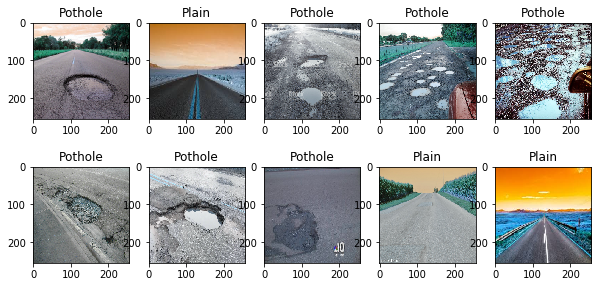

In [14]:
fig,ax=plt.subplots(2,5)
plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0)
fig.set_size_inches(10,10)

for i in range(2):
    for j in range (5):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l][:])
        ax[i,j].set_title(Z[l])
        ax[i,j].set_aspect('equal')

In [15]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,2)
print(Y)
X=np.array(X)

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=1337)

np.random.seed(42)
rn.seed(42)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [16]:
base_model=ResNet50(include_top=False, weights='imagenet',input_shape=(256,256,3), pooling='max')
base_model.summary()













94658560/94653016 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 128, 128, 64) 256         conv1[0][0]                      
______________

In [17]:
model=Sequential()
model.add(base_model)
model.add(Dropout(0.20))
model.add(Dense(2048,activation='relu'))
model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(2,activation='softmax'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



In [18]:
epochs=50
batch_size=128
red_lr=ReduceLROnPlateau(monitor='val_acc', factor=0.1, min_delta=0.0001, patience=2, verbose=1)
base_model.trainable=True # setting the VGG model to be trainable.
model.compile(optimizer=Adam(lr=1e-5),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_3 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 1026      
Total params: 30,408,066
Trainable params: 30,354,946
Non-trainable params: 53,120
___________________________________

In [19]:
History = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test,y_test))


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 30 samples, validate on 10 samples
Epoch 1/50
30/30 [==============================] - 17s 570ms/step - loss: 1.6000 - acc: 0.5333 - val_loss: 1.8566 - val_acc: 0.5000
Epoch 2/50
30/30 [==============================] - 1s 24ms/step - loss: 0.6337 - acc: 0.6667 - val_loss: 1.7555 - val_acc: 0.5000
Epoch 3/50
30/30 [==============================] - 1s 24ms/step - loss: 0.2862 - acc: 0.9000 - val_loss: 1.6405 - val_acc: 0.5000
Epoch 4/50
30/30 [==============================] - 1s 24ms/step - loss: 0.0835 - acc: 1.0000 - val_loss: 1.5874 - val_acc: 0.5000
Epoch 5/50
30/30 [==============================] - 1s 24ms/step - loss: 0.0182 - acc: 1.0000 - val_loss: 1.5548 - val_acc: 0.5000
Epoch 6/50
30/30 [==============================] - 1s 24ms/step - loss: 0.0103 - acc: 1.0000 - val_loss: 1.5165 - val_acc: 0.5000
Epoch 7/50
30/30 [==============================] - 1s 24ms/step - loss:

In [22]:
path = "/content/drive/My Drive/sihPotholeDataset/test/Pothole"
files = os.listdir(path)
files

['531.jpg',
 '593.jpg',
 '602.jpg',
 '598.jpg',
 '610.jpg',
 '605.jpg',
 '617.jpg',
 '618.jpg']

  0%|          | 0/8 [00:00<?, ?it/s]

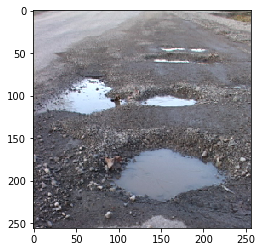

 12%|█▎        | 1/8 [00:02<00:18,  2.60s/it]

Pothole Road


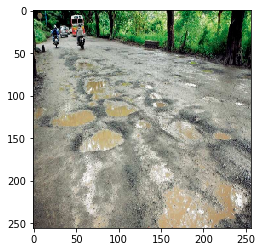

 25%|██▌       | 2/8 [00:03<00:11,  2.00s/it]

Pothole Road


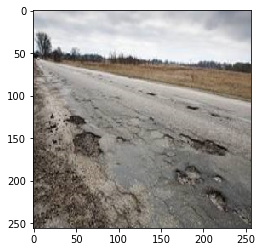

 38%|███▊      | 3/8 [00:03<00:07,  1.58s/it]

Pothole Road


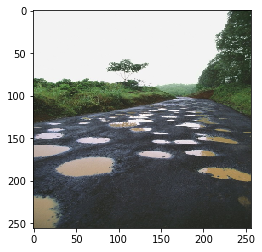

 50%|█████     | 4/8 [00:04<00:05,  1.34s/it]

Pothole Road


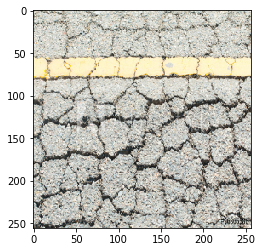

 62%|██████▎   | 5/8 [00:05<00:03,  1.20s/it]

Pothole Road


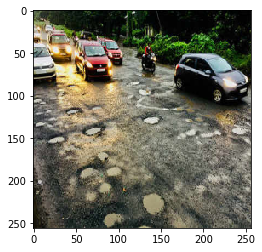

 75%|███████▌  | 6/8 [00:06<00:02,  1.04s/it]

Pothole Road


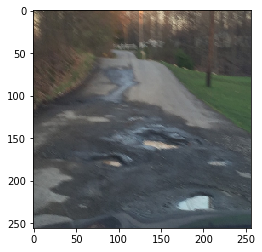

 88%|████████▊ | 7/8 [00:06<00:00,  1.16it/s]

Pothole Road


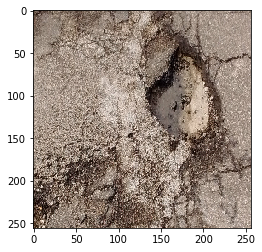

100%|██████████| 8/8 [00:07<00:00,  1.20it/s]

Pothole Road


In [23]:
for i in tqdm(files):
    pth = os.path.join(path,i)
    X = cv2.imread(pth,cv2.IMREAD_COLOR)
    X = cv2.resize(X,(256,256))
    plt.figure()
    plt.imshow(X[:,:,::-1]) 
    plt.show()  

    X = np.array(X)
    X = np.expand_dims(X, axis=0)

    y_pred = np.round(model.predict(X))
    if y_pred[0][0] == 1:
        print("Plain Road")
    else:
        print("Pothole Road")

In [24]:
path = "/content/drive/My Drive/sihPotholeDataset/test/Plain"
files = os.listdir(path)
files

['1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '8.jpg', '6.jpg', '7.jpg']

  0%|          | 0/8 [00:00<?, ?it/s]

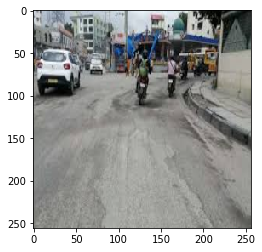

 12%|█▎        | 1/8 [00:00<00:03,  1.75it/s]

Pothole Road


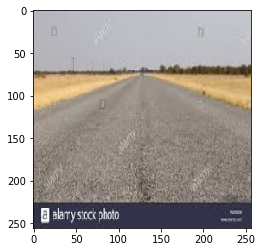

 25%|██▌       | 2/8 [00:01<00:03,  1.74it/s]

Plain Road


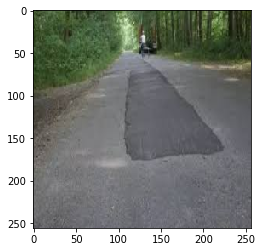

 38%|███▊      | 3/8 [00:02<00:03,  1.37it/s]

Pothole Road


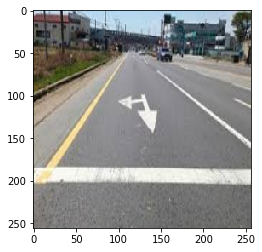

 50%|█████     | 4/8 [00:02<00:02,  1.36it/s]

Pothole Road


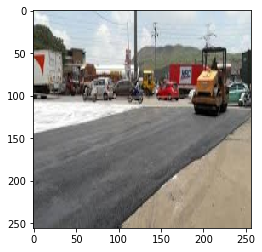

 62%|██████▎   | 5/8 [00:03<00:02,  1.44it/s]

Pothole Road


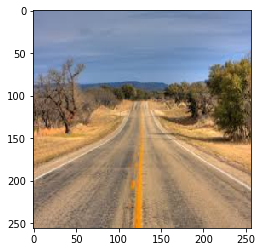

 75%|███████▌  | 6/8 [00:04<00:01,  1.49it/s]

Plain Road


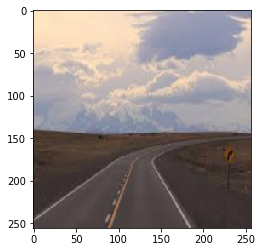

 88%|████████▊ | 7/8 [00:04<00:00,  1.53it/s]

Pothole Road


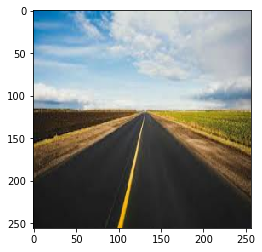

100%|██████████| 8/8 [00:05<00:00,  1.60it/s]

Plain Road


In [25]:
for i in tqdm(files):
    pth = os.path.join(path,i)
    X = cv2.imread(pth,cv2.IMREAD_COLOR)
    X = cv2.resize(X,(256,256))
    plt.figure()
    plt.imshow(X[:,:,::-1]) 
    plt.show()  


    X = np.array(X)
    X = np.expand_dims(X, axis=0)

    y_pred = np.round(model.predict(X))
    if y_pred[0][0] == 1:
        print("Plain Road")
    else:
        print("Pothole Road")